<h1 align='center'>Laboratorio de Segmentación G1</h1>

<h2>1. Importación de Librerías</h2>

Se importaron las librerías necesarias para el laboratorio




In [1]:
# Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
# Operational Libraries
import pandas as pd
import re

<h2>2. Lectura de la Tabla de Datos</h2>

El código presentado tiene como objetivo cargar un archivo de Excel llamado `dataset_clustering_propuesto.xlsx` y explorar sus hojas. Utiliza la biblioteca `pandas`, que es ampliamente utilizada para la manipulación de datos en Python. La primera línea define la variable `sheet_name` como el nombre del archivo Excel a cargar. Luego, se utiliza `pd.ExcelFile(sheet_name)` para crear un objeto `ExcelFile` que permite acceder a las hojas del archivo. A continuación, se obtiene una lista de todas las hojas disponibles dentro del archivo utilizando la propiedad `sheet_names`. Finalmente, el código imprime la lista de nombres de las hojas, lo que permite al usuario visualizar las diferentes secciones de datos contenidas en el archivo Excel.


In [2]:
#Importing the prospects dataset using pandas
sheet_name = 'dataset_clustering_propuesto.xlsx'
dataset = pd.ExcelFile(sheet_name)

# Ver todas las hojas del archivo
hojas = dataset.sheet_names

# Mostrar las hojas disponibles
print(hojas)


['atributos_propuesto', 'encuesta_propuesto', 'metadata_propuesto']


<h2>3. Transformación de los Datos</h2>

Esta sección tiene como objetivo importar un archivo de Excel llamado `dataset_clustering_propuesto.xlsx` y cargar sus hojas en diferentes DataFrames utilizando la biblioteca `pandas`. En primer lugar, se define la variable `sheet_name` con el nombre del archivo y se utiliza `pd.ExcelFile(sheet_name)` para crear un objeto que permite manipular el contenido del archivo. Luego, se obtienen los nombres de las hojas del archivo mediante la propiedad `sheet_names`, y se imprimen para mostrar las opciones disponibles al usuario. A continuación, cada hoja se carga en un DataFrame separado utilizando el método `parse()`, creando así los DataFrames `data_atributos`, `data_encuesta` y `data_metadata`. Finalmente, se realiza una copia profunda de cada DataFrame para evitar problemas futuros al modificar los datos, creando los DataFrames `dataset_atributos_numerico`, `dataset_encuesta_numerico` y `dataset_metadata_numerico`.


In [3]:


# Importar el archivo Excel
sheet_name = 'dataset_clustering_propuesto.xlsx'
dataset = pd.ExcelFile(sheet_name)

# Ver todas las hojas del archivo
hojas = dataset.sheet_names
print("Hojas disponibles:", hojas)

# Cargar cada hoja en un DataFrame
data_atributos = dataset.parse('atributos_propuesto')
data_encuesta = dataset.parse('encuesta_propuesto')

# Copiar cada DataFrame para evitar problemas futuros
dataset_atributos_numerico = data_atributos.copy(deep=True)
dataset_encuesta_numerico = data_encuesta.copy(deep=True)



Hojas disponibles: ['atributos_propuesto', 'encuesta_propuesto', 'metadata_propuesto']



<h3>3.1. Valores Nominales</h3>

Las variables nominales son las siguientes: Sexo.

In [4]:
# For Sexo there is no real hierarchy, but it has few options so we'll transform it by hand
mapper_sex = {'Prefiere no responder': 0,'Prefiere no Responder': 0, 'Femenino': 1, 'Masculino': 2}
dataset_encuesta_numerico['Sexo'] = dataset_encuesta_numerico['Sexo'].replace(mapper_sex)

# Verificación de los resultados
print(dataset_encuesta_numerico.dtypes)

# Comprobar si quedan valores no mapeados (sirvió para encontrar uno con minúscula que no estab siendo mapeado)
print(dataset_encuesta_numerico['Sexo'].unique())



Rut                  object
Sexo                  int64
Edad                  int64
Estado Civil         object
Nivel Educacional    object
Situación Laboral    object
Satisfacción         object
dtype: object
[2 1 0]


C:\Users\benst\AppData\Local\Temp\ipykernel_7920\3462530222.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_encuesta_numerico['Sexo'] = dataset_encuesta_numerico['Sexo'].replace(mapper_sex)


<h3>3.2. Variables Ordinales</h3>

En este caso las variables ordinales son estado civil, nivel educacional y situacion laboral.

In [5]:
# 3. Estado Civil
mapper_civil = {
    'Soltero': 0,
    'Soltero/a': 0,
    'Conviviendo': 1,
    'Acuerdo de Unión Civil': 2,
    'Casado/a': 3,
    'Separado/a': 4,
    'Divorciado/a': 5,
    'Viudo/a': 6
}
dataset_encuesta_numerico['Estado Civil'] = dataset_encuesta_numerico['Estado Civil'].replace(mapper_civil)
# 4. Nivel Educacional
mapper_educacion = {
    'Educación primaria': 0,
    'Educación secundaria': 1,
    'Educación técnica': 2,
    'Educación universitaria': 3,
    'Postgrado': 4
}
dataset_encuesta_numerico['Nivel Educacional'] = dataset_encuesta_numerico['Nivel Educacional'].replace(mapper_educacion)

# 5. Situación Laboral
mapper_situacion = {
    'Trabajador dependiente': 0,
    'Trabajador independiente': 1,
    'Cesante': 2,
    'Estudiante': 3,
    'Jubilado': 4
}
dataset_encuesta_numerico['Situación Laboral'] = dataset_encuesta_numerico['Situación Laboral'].replace(mapper_situacion)


#print(dataset_encuesta_numerico.head())

C:\Users\benst\AppData\Local\Temp\ipykernel_7920\1532017294.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_encuesta_numerico['Estado Civil'] = dataset_encuesta_numerico['Estado Civil'].replace(mapper_civil)
C:\Users\benst\AppData\Local\Temp\ipykernel_7920\1532017294.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_encuesta_numerico['Nivel Educacional'] = dataset_encuesta_numerico['Nivel Educacional'].replace(mapper_educacion)
C:\Users\benst\AppData\Local\Temp\ipykernel_7920\1532017294.py:31: FutureWarning

<h3>3.3. Variables de Intervalo</h3>

En este caso las variables de intervalo son la satisfacción. 

In [6]:
# 6. Satisfacción
mapper_satisfaccion = {
    'Extremadamente insatisfecho': 0,
    'Algo insatisfecho': 1,
    'Ni satisfecho ni insatisfecho': 2,
    'Algo satisfecho': 3,
    'Extremadamente satisfecho': 4
}
dataset_encuesta_numerico['Satisfacción'] = dataset_encuesta_numerico['Satisfacción'].replace(mapper_satisfaccion)

# revisar que este todo mapeado
print(dataset_encuesta_numerico['Satisfacción'].unique())


[4 0 3 1 2]


C:\Users\benst\AppData\Local\Temp\ipykernel_7920\338554610.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_encuesta_numerico['Satisfacción'] = dataset_encuesta_numerico['Satisfacción'].replace(mapper_satisfaccion)


<h3>3.4. Variables de Escala</h3>

En este caso las variables de escala son la Edad, Cuenta, Fecha de Registro, Monto Invertido, Cambios de Cartera, Visitas al Sitio, Aversión al Riesgo, Rentabilidad, Retiros.


In [7]:
#dataset_metadata_numerico = data_metadata.copy(deep=True)
#No fue necesario aplciar nada en este caso.

<h2>4. Enriquecimiento de los Datos</h2>

Para esta seccion, los datos serán enriquecidos utilizando la metadata asociada al rut.


In [8]:
data_metadata = dataset.parse('metadata_propuesto')
dataset_metadata_numerico = data_metadata.copy(deep=True)

<h3>4.2. Enriquecimiento de la Tabla Principal</h3>

Para enriquecer los datos en el dataset, se llevó a cabo un proceso de limpieza y transformación. Primero, se limpió la columna de RUT, eliminando puntos y guiones, y se eliminó el último dígito para alinearlo con el formato de las cuentas en el dataset de metadata. Luego, se realizó una combinación (merge) de los datos del dataset encuesta con el dataset de metadata, utilizando el RUT limpio y la cuenta como claves de unión. Posteriormente, se formatearon las fechas, convirtiendo los valores en un formato estándar de fecha (dd/mm/yyyy). Finalmente, se eliminaron columnas innecesarias, como el RUT limpio.

In [9]:

dataset_enriquecido = dataset_encuesta_numerico.copy(deep=True)

#limpiar rut
def limpiar_rut(rut):
    rut_limpio = rut.replace('.', '').replace('-', '')
    return rut_limpio[:-1]  

dataset_enriquecido['Rut_limpio'] = dataset_enriquecido['Rut'].apply(limpiar_rut)

dataset_enriquecido['Rut_limpio'] = dataset_enriquecido['Rut_limpio'].astype(str)
dataset_metadata_numerico['Cuenta'] = dataset_metadata_numerico['Cuenta'].astype(str)

dataset_final = dataset_enriquecido.merge(
    dataset_metadata_numerico,
    left_on='Rut_limpio',
    right_on='Cuenta',
    how='outer' 
)

dataset_final = dataset_final.drop('Rut_limpio', axis=1)

dataset_final['Fecha de Registro'] = pd.to_datetime(dataset_final['Fecha de Registro'], errors='coerce')

dataset_final['Fecha de Registro'] = dataset_final['Fecha de Registro'].dt.strftime('%d/%m/%Y')

dataset_enriquecido = dataset_final

print(dataset_enriquecido.dtypes)


Rut                    object
Sexo                    int64
Edad                    int64
Estado Civil            int64
Nivel Educacional       int64
Situación Laboral       int64
Satisfacción            int64
Cuenta                 object
Fecha de Registro      object
Monto Invertido         int64
Cambios de Cartera      int64
Visitas al Sitio        int64
Aversión al Riesgo      int64
Rentabilidad          float64
Retiros                 int64
dtype: object


Gracias al enriquecimento del dataset principal, ahora disponemos de un dataset enriquecido informacion acerca de las cuentas de los usuarios.
<h2>5. Revisión Primaria de la Tabla</h2>

Se observó luego que la fecha era más conveniente dejarla con formato int al igual que las cuentas.

Luego, se revisa que todo esté de acuerdo a lo esperado.


In [10]:

dataset_enriquecido['Cuenta'] = pd.to_numeric(dataset_enriquecido['Cuenta'], errors='coerce')
dataset_enriquecido['Sexo'] = pd.to_numeric(dataset_enriquecido['Sexo'], errors='coerce')
print("\nPrimeras filas del dataset enriquecido:")
#print(dataset_enriquecido.head())
print(dataset_enriquecido.dtypes)



Primeras filas del dataset enriquecido:
Rut                    object
Sexo                    int64
Edad                    int64
Estado Civil            int64
Nivel Educacional       int64
Situación Laboral       int64
Satisfacción            int64
Cuenta                  int64
Fecha de Registro      object
Monto Invertido         int64
Cambios de Cartera      int64
Visitas al Sitio        int64
Aversión al Riesgo      int64
Rentabilidad          float64
Retiros                 int64
dtype: object


In [11]:
dataset_enriquecido['Fecha de Registro'] = dataset_enriquecido['Fecha de Registro'].str.replace('/', '', regex=False)
dataset_enriquecido['Fecha de Registro']= pd.to_numeric(dataset_enriquecido['Fecha de Registro'], errors='coerce')
print(dataset_enriquecido['Fecha de Registro'])


0       6052023
1      10082022
2      31032022
3       4052022
4      12082023
         ...   
176    14052022
177    29012021
178    16062021
179    11092021
180    22042021
Name: Fecha de Registro, Length: 181, dtype: int64


Se revisa el dataset en general utilizando describe ().


In [12]:
dataset_enriquecido.describe()

,Sexo,Edad,Estado Civil,Nivel Educacional,Situación Laboral,Satisfacción,Cuenta,Fecha de Registro,Monto Invertido,Cambios de Cartera,Visitas al Sitio,Aversión al Riesgo,Rentabilidad,Retiros
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02,1.810000e+02,1.810000e+02,181.000000,181.000000,181.000000,181.00000,181.000000
mean,1.375691,43.447514,2.298343,3.022099,0.867403,3.182320,1.362376e+07,1.632009e+07,2.289449e+06,11.839779,31.093923,72.176796,0.11158,125586.723757
std,0.607605,10.035147,2.086850,0.482537,0.903136,0.985967,3.508875e+06,9.269397e+06,1.123746e+06,18.463230,20.367922,26.987275,0.02433,94791.167594
min,0.000000,27.000000,0.000000,2.000000,0.000000,0.000000,7.836302e+06,1.022021e+06,2.002700e+05,0.000000,2.000000,4.000000,0.06800,2410.000000
25%,1.000000,35.000000,0.000000,3.000000,0.000000,3.000000,1.064767e+07,8.122021e+06,1.424797e+06,2.000000,11.000000,50.000000,0.10100,39765.000000
50%,1.000000,44.000000,2.000000,3.000000,1.000000,3.000000,1.335131e+07,1.606202e+07,2.234948e+06,4.000000,35.000000,90.000000,0.11000,117396.000000
75%,2.000000,52.000000,4.000000,3.000000,1.000000,4.000000,1.666349e+07,2.502202e+07,3.207040e+06,12.000000,43.000000,95.000000,0.11800,195419.000000
max,2.000000,60.000000,6.000000,4.000000,4.000000,4.000000,1.948143e+07,3.108202e+07,5.392160e+06,109.000000,116.000000,100.000000,0.23500,399317.000000


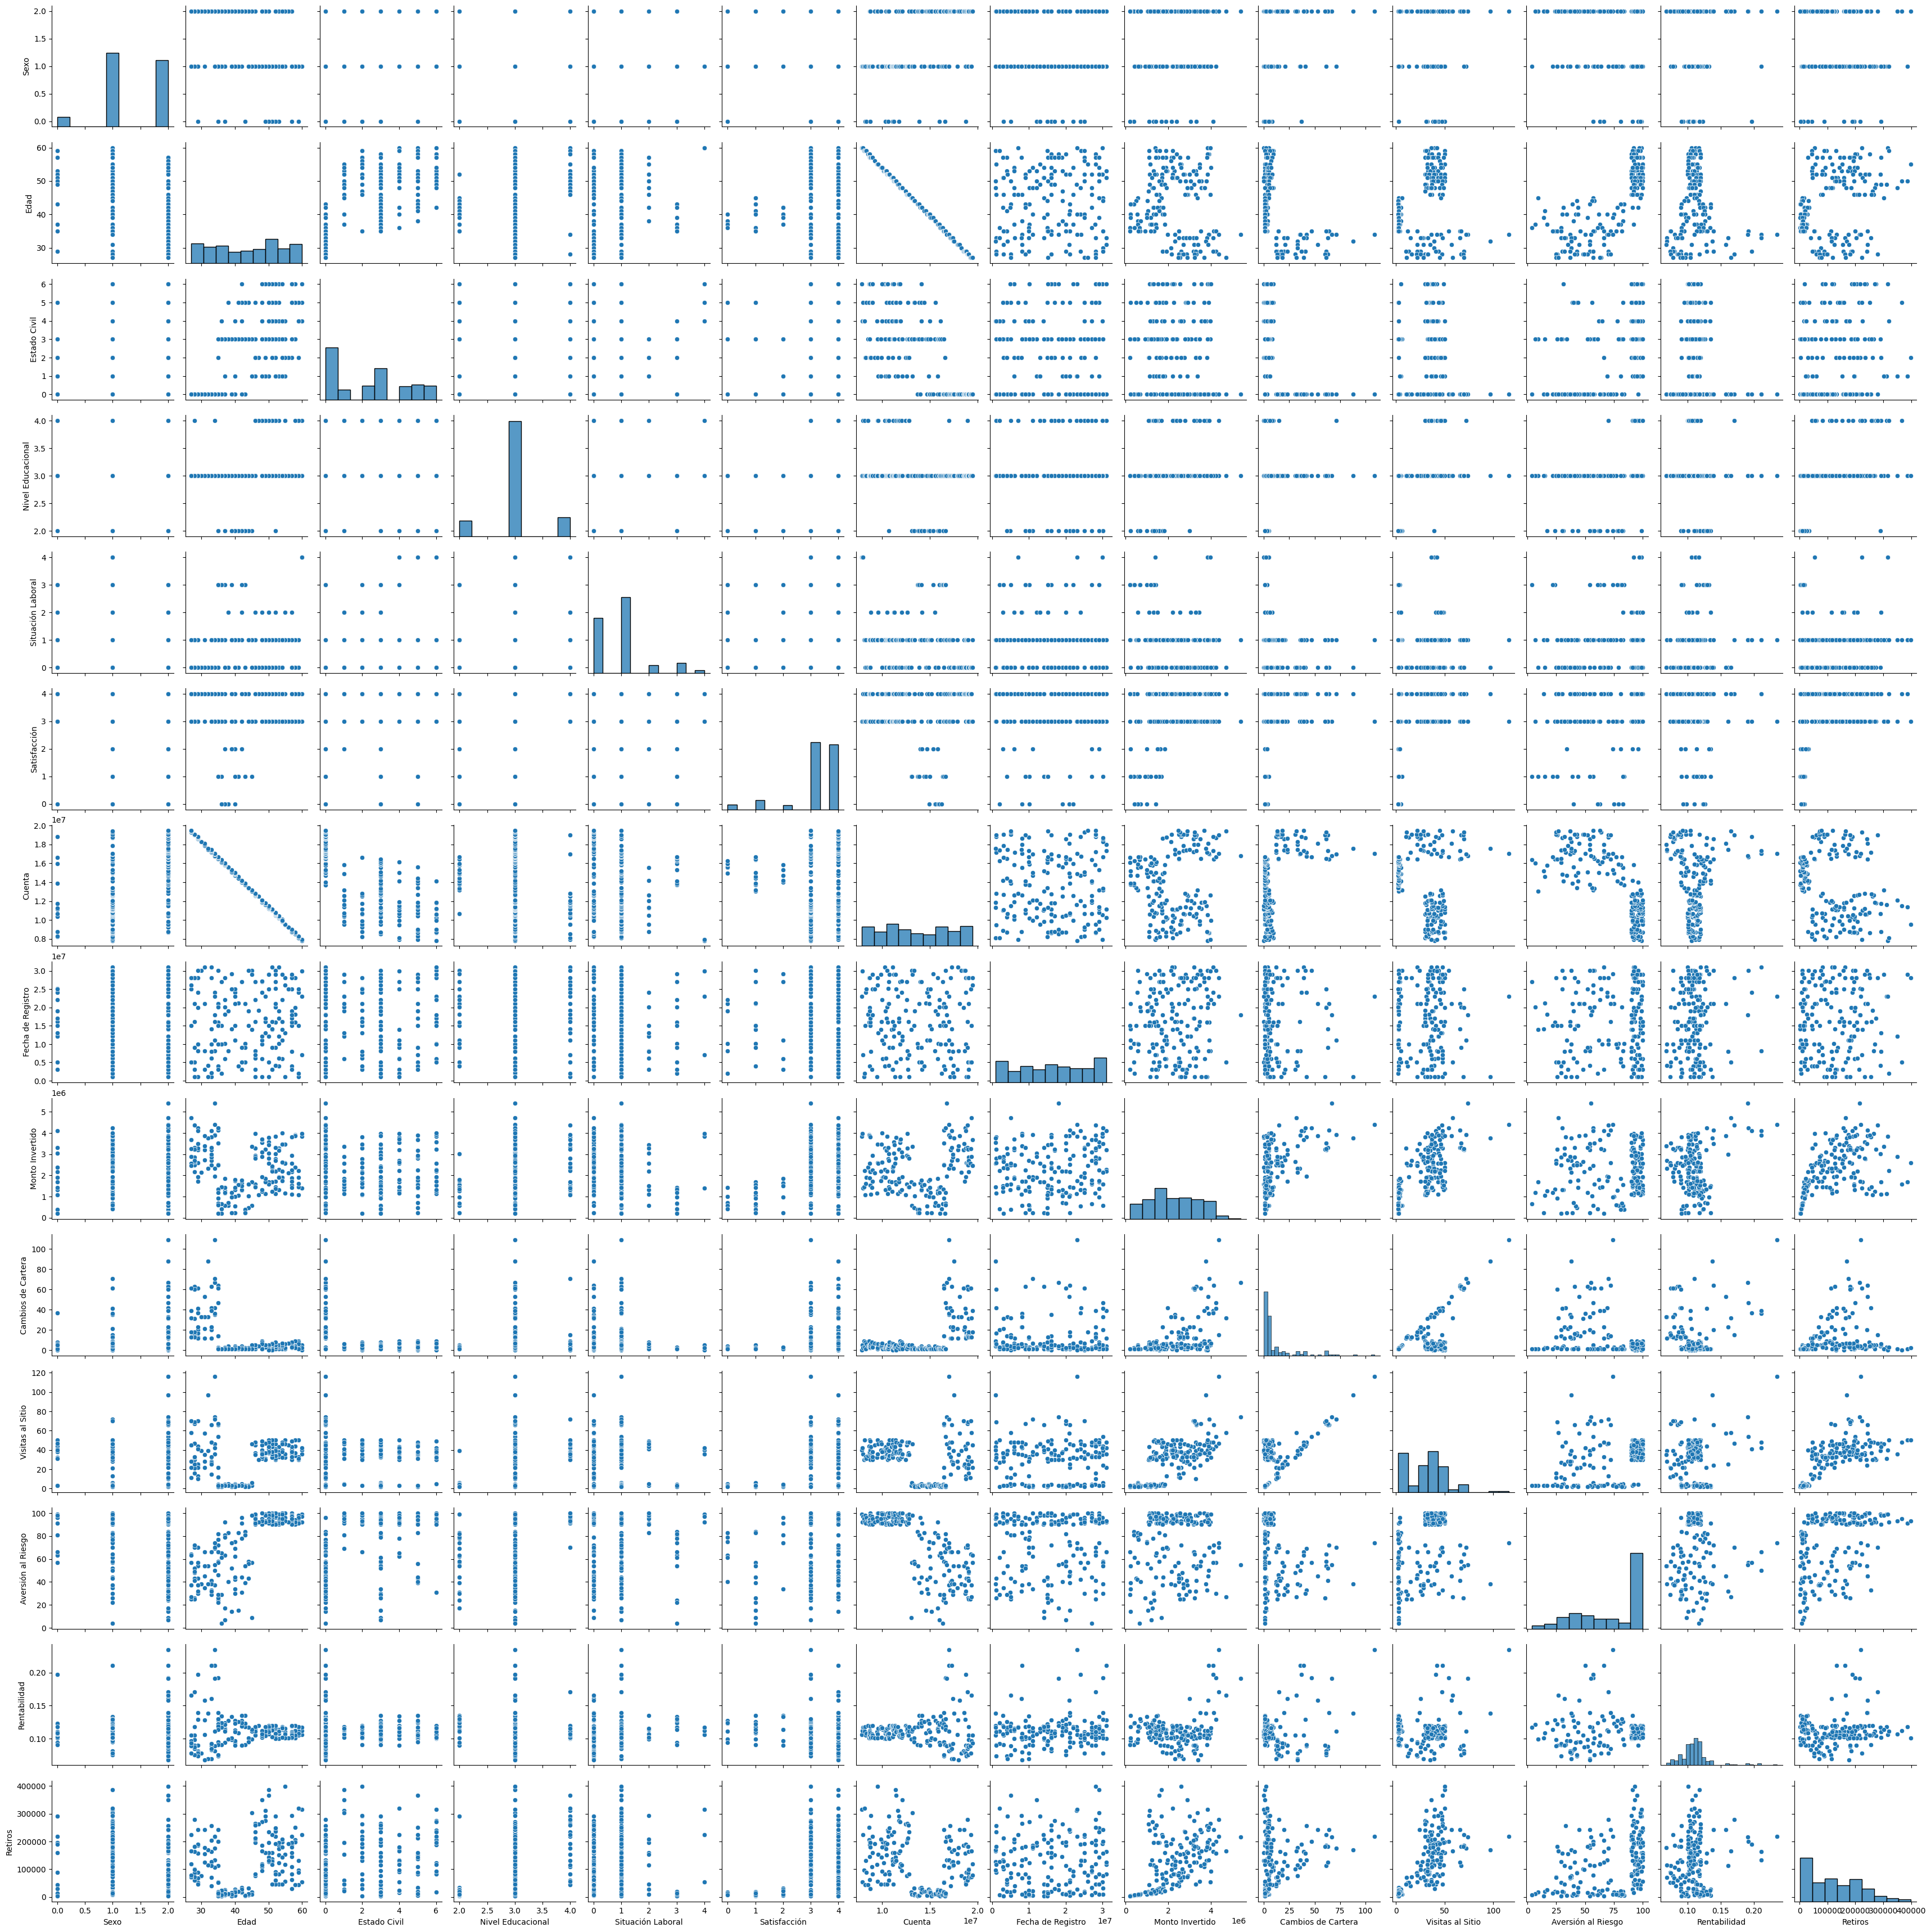

In [13]:
# Excluding spurious variables from our columns' dataset
cols = [col for col in dataset_enriquecido.columns if col != 'Rut']

# Plot pairwise relationships in our dataset
pairwise_plot = sns.pairplot(dataset_enriquecido[cols])

La mayoría de los gráficos generados corresponde a nubes de puntos sin mayor interpretación posible. Otros tantos son gráficos de variables booleanas o con muy pocas alternativas como para detectar patrones claros.

Sin embargo, sí hay ciertas variables que al interactuar una con la otra se dividen en grupos o marcan tendencias. Ejemplos de ello son la edad con el consumo, la pobreza de la comuna con el consumo y la frecuencia de compra con el consumo. No tomaremos en cuenta la comuna, pues esta variable nos sirvió de llave para medir la pobreza, y por lo tanto nuestro análisis se centrará la variable que derivamos.

<h3>6.2. Visualización en Tres Dimensiones</h3>

El nivel eduacional, la situación laboral y los montos invertidos son interesantes.


In [29]:

# Establecer el renderer por defecto para abrir el gráfico en el navegador
pio.renderers.default = 'vscode'
#si se les queda muy pegado comenten la línea anterior y usen esta
#pio.renderers.default = 'browser'

# Visualize up to three variables using a 3d scatter plot with plotly

fig1 = px.scatter_3d(dataset_enriquecido, x='Nivel Educacional', y='Situación Laboral',
                     z='Monto Invertido')


fig2 = px.scatter_3d(dataset_enriquecido, x='Estado Civil', y='Nivel Educacional',
                     z='Monto Invertido')


fig3= px.scatter_3d(dataset_enriquecido, x='Situación Laboral', y='Sexo',
                    z='Monto Invertido')


fig1.show()
fig2.show()
fig3.show()

Con los análisis anteriormente realizados, y si etiquetamos y revisamos exhaustivamente cada uno de los grupos, podríamos dar con una buena segmentación a priori.

No obstante, esto sólo nos servirá para identificar el número de segmentos hasta las tres dimensiones. Para segmentos cuyas variables críticas sean más de tres, tendremos que utilizar métodos estadísticos más complejos, como los que veremos a continuación.

<h2>7. Algoritmos de Segmentación Jerárquica</h2>

Se denomina segmentación jerárquica a aquella cuyos grupos comparten una raíz común en la muestra, separándose gradualmente y en forma interconectada en diferentes ramas. A continuación, importaremos las librerías específicas para realizar estas operaciones.

In [30]:
# Clustering Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<h3>7.1. Normalización, Depuración y Dendogramas</h3>

Normalmente, este ejercicio se inicia con la construcción de una gráfica denominada dendograma. En este caso, aplicaremos el método de mínima varianza de Ward para minimizar la varianza entre los clústers.

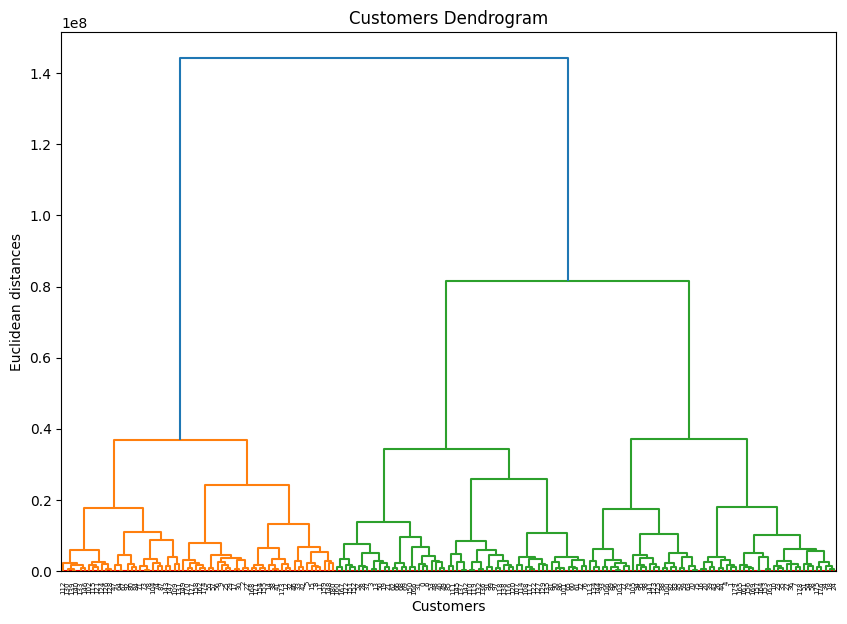

In [31]:
# Preparing our plot
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")
plt.ylabel('Euclidean distances')
plt.xlabel('Customers')

# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Rut']
filtered_cols = [col for col in dataset_enriquecido.columns
                 if col not in excluded_cols]

selected_data = dataset_enriquecido[filtered_cols].copy(deep=True) #[['Nivel Educacional', 'Situación Laboral', 'Monto Invertido']]

clusters = sch.linkage(selected_data, method='ward', metric="euclidean")

# Aproximation to the number of clusters
plt.axhline(y = 500, color = 'r', linestyle = '-')

# Creating and showing our dendogram
sch.dendrogram(Z=clusters)
plt.show()

Para determinar la cantidad de clústers, observaremos las distancias euclidianas, buscando el punto en que ellas son más largas, para luego trazar una línea horizontal aproximadamente por la mitad, en lo que se denomina "el método de Thorndike". La cantidad de verticales que atraviese es considerada una buena aproximación a la cantidad de clústers que tendremos en nuestra muestra [(Thorndike, 1953)](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.177.7605).

Dada la segmentación a priori, sabemos que contamos con al menos tres segmentos. Aplicando el método de Thorndike, tendríamos que concluir que en la muestra se observan dos segmentos. Sin embargo, y como mencionamos previamente, sabemos que en nuestra muestra hay variables cuya magnitud podría estar afectando nuestros análisis. Una forma de controlar por ello es normalizando los datos, cuestión que haremos a continuación.

In [32]:
dataset_normalized = dataset_enriquecido.copy(deep=True)

# Normalize each column of the dataset
for column in dataset_normalized.columns:
    # Check if column is numeric
    if dataset_normalized[column].dtype == 'object':
        continue

    # Normalize column
    dataset_normalized[column] = (dataset_normalized[column] - dataset_normalized[column].min()) / \
                                  (dataset_normalized[column].max() - dataset_normalized[column].min())

    # Transform NA values to zero
    dataset_normalized[column] = dataset_normalized[column].fillna(0)

    # Multiply by 100 to get a percentage and transform to int
    dataset_normalized[column] = (dataset_normalized[column] * 100).astype(int)

Tenga en cuenta, que para ejecutar el algoritmo que genera el dendograma, fue necesario transformar los valores normalizados de números decimales a enteros, multiplicando por 100 y forzando las columnas a tipo entero. Así, habiendo normalizado y transformado los datos, podemos analizar nuevamente el dendograma y evaluar si se corrigieron o no los problemas.

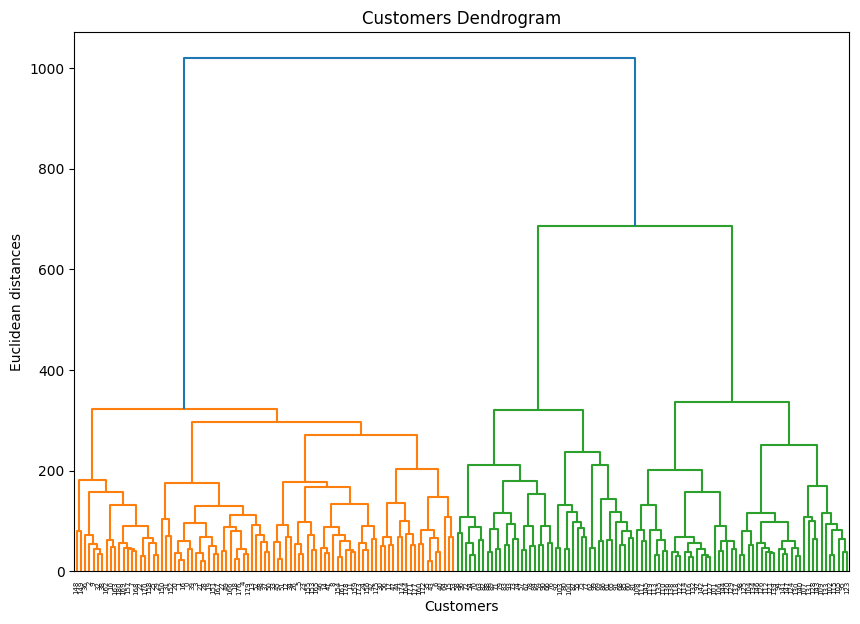

In [33]:
# Preparing our plot
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")
plt.ylabel('Euclidean distances')
plt.xlabel('Customers')

# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Rut']
filtered_cols = [col for col in dataset_normalized.columns
                 if col not in excluded_cols]

selected_data = dataset_normalized[filtered_cols].copy(deep=True)
clusters = sch.linkage(selected_data, method='ward', metric="euclidean")

# Creating and showing our dendogram
sch.dendrogram(Z=clusters)
plt.show()

Lamentablemente, aún cuando normalizamos los datos, el dendograma sigue sin arrojar un resultado correcto. Esta vez, el problema se debe a la presencia de variables espúreas, ya que no contribuyen más que sólo ruido. Así, y con el afán de depurar nuestra base, reduciremos el caso a las variables que presentan los patrones más notorios en nuestro pairplot:

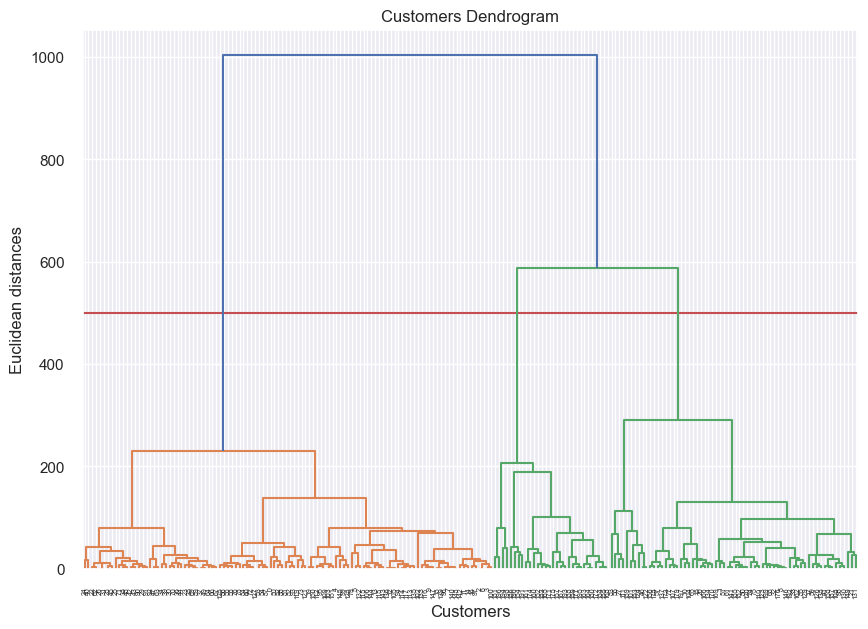

In [122]:
# Preparing our plot
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")
plt.ylabel('Euclidean distances')
plt.xlabel('Customers')

# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Identificador', 'Edad', 'Nacionalidad', 'Comuna',
                 'Ubicación', 'Local', 'Segmento', 'Experiencia']

filtered_cols = [col for col in dataset_normalized.columns
                 if col not in excluded_cols]

selected_data = dataset_normalized[filtered_cols].copy(deep=True)

clusters = sch.linkage(selected_data, method='ward', metric="euclidean")

# Aproximation to the number of clusters
plt.axhline(y = 500, color = 'r', linestyle = '-')

# Creating and showing our dendogram
sch.dendrogram(Z=clusters)
plt.show()

<h3>7.2. Visualización de los Segmentos Creados</h3>

Existen dos algoritmos para clusterizar en forma jerárquica: los aglomerativos y los divisivos. En este ejercicio utilizaremos una estrategia aglomerativa, donde cada observación comienza en su propio grupo, y los pares de grupos son mezclados mientras uno sube en la jerarquía, en forma ascendente.

No obstante, y tanto para la determinación del número de grupos por medio del dendograma como para la clasificación de los individuos de nuestra muestra, se recomienda hacer uso de diferentes vínculos y métricas, y observar los resultados generados con una perspectiva de negocios [(Sampaio, 2022)](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/).

Text(0.5, 1.0, 'Labeled Customer Data')

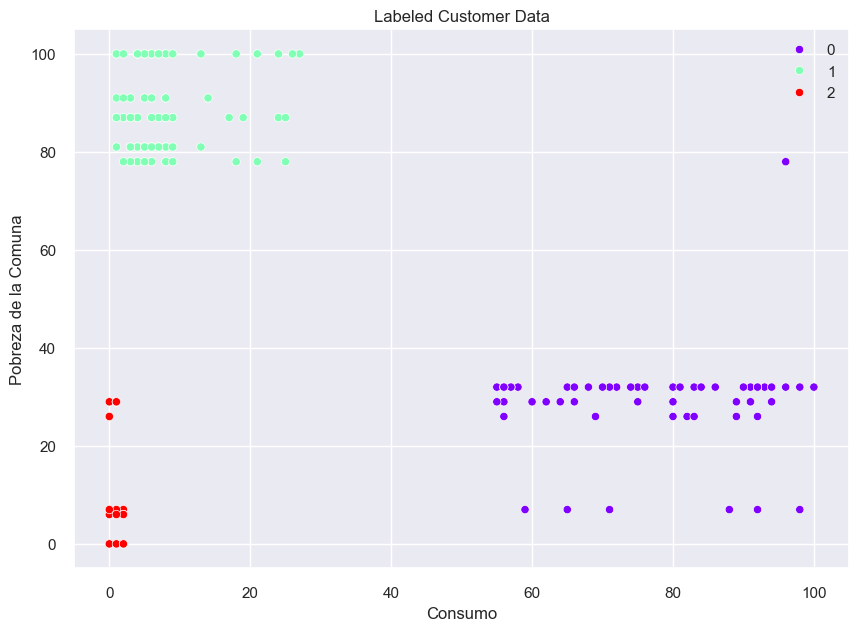

In [123]:
# Divisive Hierarchical Clustering using the euclidean distance and ward method
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean',
                                           linkage='ward')
clustering_model.fit(selected_data)

# Accessing vars of the clustering object
data_labels_v1 = clustering_model.labels_

# Visualization of our graph
sns.set(rc={'figure.figsize':(10, 7)})
sns.scatterplot(x='Consumo', y='Pobreza de la Comuna', data=selected_data,
                palette="rainbow", hue=data_labels_v1)\
                .set_title('Labeled Customer Data')

<h3>7.3. Asignación de los Segmentos a la Muestra</h3>

Por último, agregamos una columna a nuestro dataset, cuyo contenido viene dado por las operaciones previas y permite asignar el grupo correcto a cada individuo..

In [124]:
# Copying our dataset to avoid future issues
dataset_segmented_v1 = dataset_corregido.copy(deep=True)

# Adding clusters and reverting values from numeric
segments = [f'cluster_{group + 1:02d}' for group in data_labels_v1]
dataset_segmented_v1.insert(loc=1, column='segment', value=segments)

dict_mappers = {'Sexo': mapper_sex, 'Nacionalidad': mapper_nationality,
                'Nivel Educacional': mapper_education,
                'Ubicación': mapper_ubicacion, 'Comuna': mapper_city,
                'Local': mapper_local, 'Experiencia': mapper_experience}

for col, mapper in dict_mappers.items():
  mapper_inv = {v: k for k, v in mapper.items()}
  dataset_segmented_v1[col] = dataset_segmented_v1[col].replace(mapper_inv)

dataset_segmented_v1.sort_values(by=['segment', 'Identificador'], inplace=True)
dataset_segmented_v1

,Identificador,segment,Sexo,Edad,Nacionalidad,Nivel Educacional,Ubicación,Comuna,Pobreza de la Comuna,Local,Frecuencia,Consumo,Experiencia
1,2,cluster_01,Masculino,43,Chilena,Educación universitaria,Nororiente,Las Condes,0.048,Manquehue Norte,18,488729,Ni satisfecho ni insatisfecho
8,9,cluster_01,Masculino,47,Peruana,Educación universitaria,Centro,Santiago,0.116,La Florida,18,463002,Algo insatisfecho
10,11,cluster_01,Masculino,32,Chilena,Educación universitaria,Nororiente,Las Condes,0.048,Manquehue Norte,15,328849,Ni satisfecho ni insatisfecho
15,16,cluster_01,Masculino,50,Chilena,Educación universitaria,Centro,Santiago,0.116,La Florida,13,365240,Algo insatisfecho
17,18,cluster_01,Masculino,46,Peruana,Educación técnica,Sur,San Miguel,0.116,La Florida,12,469699,Algo satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,165,cluster_03,Masculino,30,Chilena,Educación técnica,Nororiente,Vitacura,0.046,Manquehue Norte,6,26942,Extremadamente satisfecho
194,168,cluster_03,Prefiere no Responder,36,Chilena,Educación universitaria,Nororiente,Vitacura,0.046,Manquehue Norte,1,25017,Extremadamente satisfecho
195,178,cluster_03,Masculino,40,Chilena,Educación universitaria,Nororiente,Providencia,0.098,Manquehue Norte,6,19733,Extremadamente insatisfecho
196,187,cluster_03,Femenino,34,Peruana,Postgrado,Nororiente,Lo Barnechea,0.028,Manquehue Norte,6,26222,Extremadamente insatisfecho


<h2>8. Algoritmos de Segmentación No-Jerárquica</h2>

La segmentación no jerárquica implica la formación de grupos fusionando o dividiendo los clústers en forma no ramificada. Estas técnicas agrupan los datos para maximizar o minimizar algunos criterios de evaluación. K-Means es un algoritmo simple de *machine learning* de tipo no-supervisado que agrupa los datos en un número específico (k) de grupos.

In [125]:
# Clustering Libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

<h3>8.1. Definición de la cantidad de Clústers</h3>

A continuación, filtraremos la mínima cantidad de variables con las que podemos correr el método del "codo" para definir la cantidad de segmentos a crear. Al igual que en el método jerárquico, seguramente necesitemos normalizar y omitir una serie de variables para que nuestro modelo sea parsimonioso.

De todas formas, es útil observar el proceso completo y ver cómo aplica en la práctica el concepto de que si entran datos de mala calidad a un modelo, los resultados de éste también serán de mala calidad. A este concepto se lo conoce por la sigla GIGO (Garbage In, Garbage Out) y se le atribuye a George Fuechsel (2004).

In [126]:
# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Identificador']
cols = [col for col in dataset_corregido.columns if col not in excluded_cols]
base_data = dataset_corregido[cols].copy(deep=True)

Filtrados ya los datos, crearemos una función que calcula el algoritmo de k-medias en un loop entre 2 y 11 clústers, para así determinar el óptimo observando la suma del cuadrado de las distancias entre grupos (WCSS, por sus siglas en inglés):

\begin{align}
WCSS = \sum_{i\in n} (X_i-Y_i)^2
\end{align}

A continuación, haremos el ejercicio manualmente en un *for loop*:

In [127]:
def manual_elbow(selected_data):
  # Storing processed information and models
  df_kmeans = pd.DataFrame(columns=['clusters', 'wcss'])
  dict_kmeans = {}

  for i in range(1, 11):
    df_kmeans.loc[i, 'clusters'] = i

    # Definition of our k-means model and fitting our model
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                    n_init=10, random_state=0)

    y_kmeans = kmeans.fit(selected_data)

    # Sum of squared distances to the closest cluster center
    df_kmeans.loc[i, 'wcss'] = kmeans.inertia_

    # Storing all variables for our specific
    dict_kmeans[i] = y_kmeans

  return {'df': df_kmeans, 'dict': dict_kmeans}

El número óptimo de clústers se define visualmente, observando el punto donde la pendiente de la curva se suaviza. El nombre del método viene dado imaginando que la curva fuera un brazo apoyado sobre una superficie, donde el punto de inflexión sería el codo.

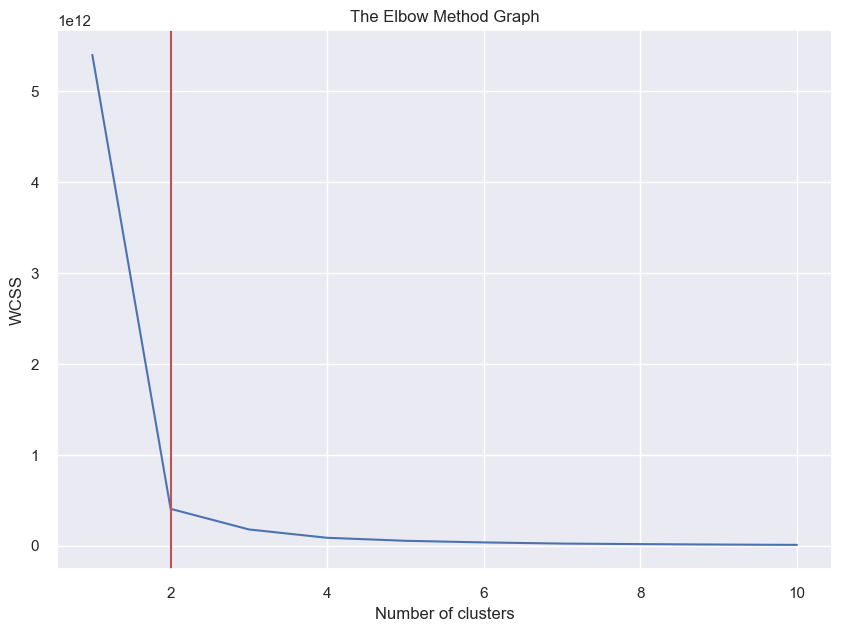

In [128]:
kmeans_base = manual_elbow(base_data)

# Plot the elbow graph
plt.plot(kmeans_base['df'].index.to_list(), kmeans_base['df']['wcss'].to_list())
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Visual proximation to the number of clusters
plt.axvline(x=2, color='r', linestyle='-')

# Plotting
plt.show()

Evidentemente, los datos son el problema y, en esencia, estamos en presencia de un problema similar al del punto 7.1. Conocida ya la solución, simplemente utilizaremos el DataFrame generado en ese punto, excluyendo también las mismas columnas.

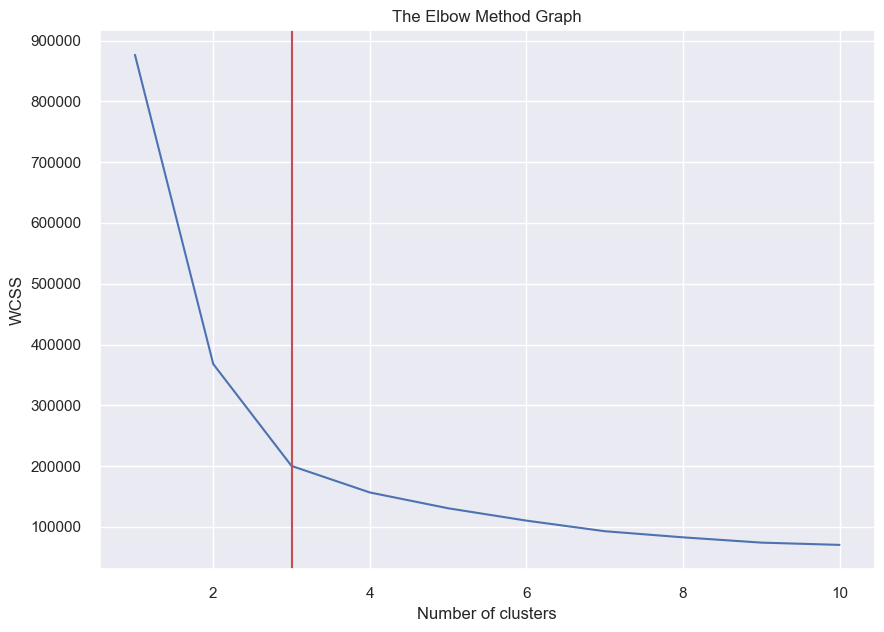

In [129]:
# Selecting Annual Income and Spending Scores by index
excluded_cols = ['Identificador', 'Edad', 'Nacionalidad', 'Comuna',
                 'Ubicación', 'Local', 'Segmento', 'Experiencia']

filtered_cols = [col for col in dataset_normalized.columns
                 if col not in excluded_cols]

selected_data = dataset_normalized[filtered_cols].copy(deep=True)
kmeans = manual_elbow(selected_data)

# Plot the elbow graph
plt.plot(kmeans['df'].index.to_list(), kmeans['df']['wcss'].to_list())
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Visual proximation to the number of clusters
plt.axvline(x=3, color='r', linestyle='-')

# Plotting
plt.show()

<h3>8.2. Cálculo Matemático del Óptimo</h3>

A continuación, se presenta una aproximación matemática al óptimo número de grupos a formarse en nuestro proceso de segmentación. Más información y detalle en el artículo de [Granville (2019)](https://www.datasciencecentral.com/how-to-automatically-determine-the-number-of-clusters-in-your-dat/).

In [130]:
# Copying our dataset to avoid future issues
df_optimal = kmeans['df'].copy(deep=True)

for i in range(df_optimal.shape[0]):
  index = df_optimal.index[i]

  if i > 0: # Avoiding first value for which there's no delta
    delta01 = df_optimal.loc[index-1, 'wcss'] - df_optimal.loc[index, 'wcss']
    df_optimal.loc[index, 'Delta 1'] = delta01

  if i > 1: # Avoiding second value for which there's no delta
    delta02 = df_optimal.loc[index-1, 'Delta 1'] - df_optimal.loc[index, 'Delta 1']
    df_optimal.loc[index, 'Delta 2'] = delta02

    # Strenght calculations and filters
    strenght = df_optimal.loc[index-1, 'Delta 2'] - df_optimal.loc[index, 'Delta 1']
    df_optimal.loc[index, 'Strenght'] = next(s if s > 1 else None
                                             for s in [strenght])

df_optimal['Relative Strenght'] = df_optimal['Strenght'] / df_optimal.index
df_optimal.set_index(keys='clusters', drop=True, inplace=True)

# Optimal k by strenght values
max_strenght = df_optimal['Relative Strenght'].max()
optimal_k = df_optimal[df_optimal['Relative Strenght']==max_strenght].index[0]

# Display of calculation tables
display(df_optimal)

print(f'\nEl número óptimo es de {optimal_k} clústers.')

,wcss,Delta 1,Delta 2,Strenght,Relative Strenght
clusters,,,,,
1,876423.21,NaN,NaN,NaN,NaN
2,367925.931313,508497.278687,NaN,NaN,NaN
3,200331.508176,167594.423137,340902.855550,None,NaN
4,156689.757555,43641.750621,123952.672516,297261.104929,74315.276232
5,130698.388857,25991.368698,17650.381923,97961.303818,19592.260764
6,110380.845927,20317.542929,5673.825769,None,NaN
7,92961.994412,17418.851515,2898.691414,None,NaN
8,82891.185789,10070.808623,7348.042892,None,NaN
9,74189.701993,8701.483796,1369.324827,None,NaN



El número óptimo es de 4 clústers.


Lamentablemente, en este caso el resultado no es el esperado. Más que desalentar el uso de este método, considere este resultado como una motivación al uso de diversas aproximaciones al número correcto de clústeres. Esto explica la interrogante frecuente del por qué utilizar métodos no-jerárquicos, si ya concluimos con el modelo del punto 7, por ejemplo.

<h3>8.3. Definición Automática del Número de Clústers</h3>

Una de las bondades de utilizar Python frente a otras herramientas para hacer estadísticas, es el gran número de contribuidores que trabajan constantemente para simplificar los métodos y funciones más utilizados en sus respectivas áreas de estudio. Así, la librería <code>yellowbrick</code> nos ofrece una alternativa sencilla para la determinación del número de clústers mediante el método del codo.

Se recomienda utilizar este enfoque a futuro, aunque para el ejercicio propuesto se pide desarrollar el algoritmo mediante la estrategia anterior, pudiéndose corroborar los resultados con este enfoque.

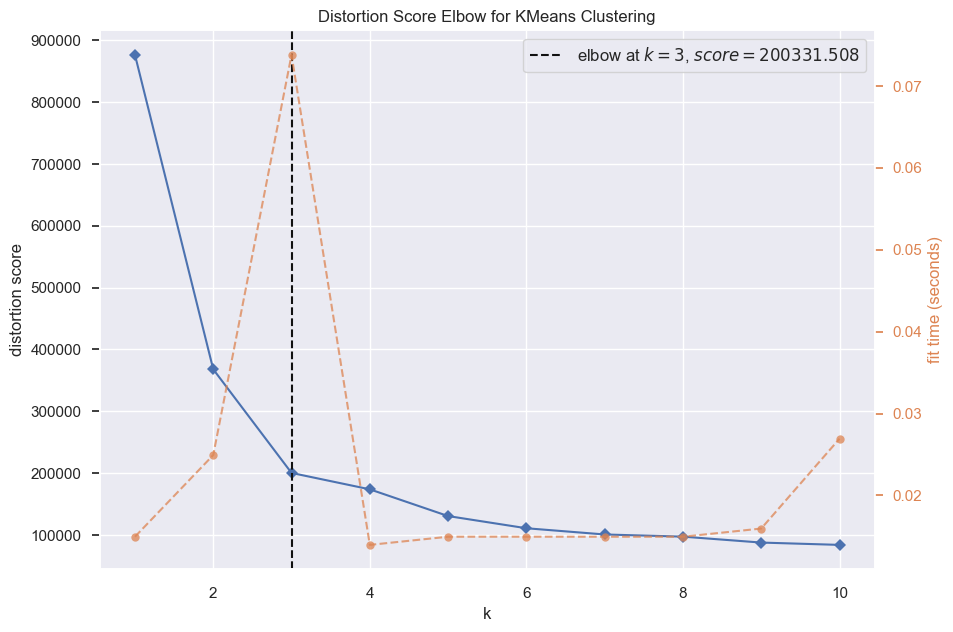

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, random_state=5), k=(1, 11))

In [131]:
  # UMétodo rápido para determinar el número de clústers
kelbow_visualizer(KMeans(random_state=5, n_init='auto'),
                  selected_data, k=(1,11))

Gracias a yellowbrick, y por la coincidencia de los resultados de las aproximaciones a la cantidad de clústeres de ambos modelos, podemos tranquilamente afirmar que estamos en presencia de tres segmentos.

<h3>8.4. Visualización de los Segmentos Creados</h3>

Este paso no es realmente necesario, pero al igual que en el caso jerárquico, nos permite monitorear el rendimiento de los algoritmos aplicados en la clasificación realizada. Así, el objetivo es determinar visualmente si los clústers creados se condicen con la observación inicial y los resultados esperados.

Text(0.5, 1.0, 'Labeled Customer Data')

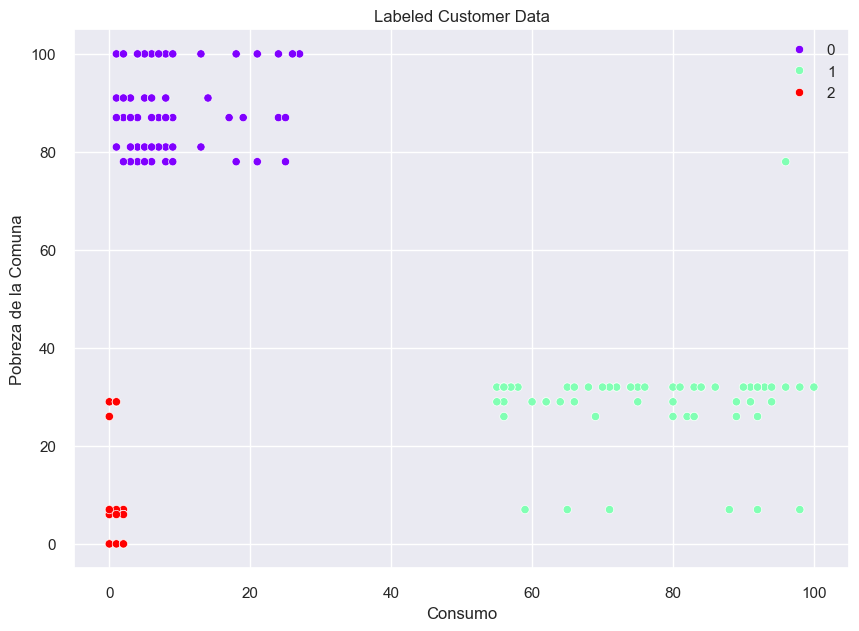

In [132]:
# Final clustering model
clustering_model = kmeans['dict'][3]

# Accessing vars of the clustering object
data_labels_v2 = clustering_model.labels_

# Visualization of our graph
sns.set(rc={'figure.figsize':(10, 7)})
sns.scatterplot(x='Consumo', y='Pobreza de la Comuna', data=selected_data,
                palette="rainbow", hue=data_labels_v2)\
                .set_title('Labeled Customer Data')

<h3>8.5. Asignación de los Segmentos a la Muestra</h3>

Por último, agregamos una columna a nuestro dataset, cuyo contenido viene dado por las operaciones previas y permite asignar el grupo correcto a cada individuo. Al contar con los DataFrames de uno y otro método, podremos determinar la efectividad de ambos modelos para reconocer cada segmento, además de analizar las diferencias entre ambos.

In [133]:
# Copying our dataset to avoid future issues
dataset_segmented_v2 = dataset_corregido.copy(deep=True)

# Adding clusters and reverting values from numeric
segments = [f'cluster_{group + 1:02d}' for group in data_labels_v2]
dataset_segmented_v2.insert(loc=1, column='segment', value=segments)

dict_mappers = {'Sexo': mapper_sex, 'Nacionalidad': mapper_nationality,
                'Nivel Educacional': mapper_education,
                'Ubicación': mapper_ubicacion, 'Comuna': mapper_city,
                'Local': mapper_local, 'Experiencia': mapper_experience}

for col, mapper in dict_mappers.items():
  mapper_inv = {v: k for k, v in mapper.items()}
  dataset_segmented_v2[col] = dataset_segmented_v2[col].replace(mapper_inv)

dataset_segmented_v2.sort_values(by=['segment', 'Identificador'], inplace=True)
dataset_segmented_v2

,Identificador,segment,Sexo,Edad,Nacionalidad,Nivel Educacional,Ubicación,Comuna,Pobreza de la Comuna,Local,Frecuencia,Consumo,Experiencia
0,1,cluster_01,Femenino,59,Chilena,Educación primaria,Norponiente,Renca,0.262,La Florida,8,132728,Ni satisfecho ni insatisfecho
2,3,cluster_01,Femenino,24,Peruana,Educación secundaria,Suroriente,Puente Alto,0.271,Los Trapenses,5,55191,Algo satisfecho
3,4,cluster_01,Femenino,28,Venezolana,Educación secundaria,Norponiente,Renca,0.262,Los Trapenses,6,31736,Algo satisfecho
4,5,cluster_01,Femenino,30,Boliviana,Educación secundaria,Norte,Huechuraba,0.238,Los Trapenses,7,140141,Extremadamente insatisfecho
5,6,cluster_01,Femenino,58,Ecuatoriana,Educación secundaria,Sur,San Ramón,0.295,La Florida,4,132614,Algo satisfecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,165,cluster_03,Masculino,30,Chilena,Educación técnica,Nororiente,Vitacura,0.046,Manquehue Norte,6,26942,Extremadamente satisfecho
194,168,cluster_03,Prefiere no Responder,36,Chilena,Educación universitaria,Nororiente,Vitacura,0.046,Manquehue Norte,1,25017,Extremadamente satisfecho
195,178,cluster_03,Masculino,40,Chilena,Educación universitaria,Nororiente,Providencia,0.098,Manquehue Norte,6,19733,Extremadamente insatisfecho
196,187,cluster_03,Femenino,34,Peruana,Postgrado,Nororiente,Lo Barnechea,0.028,Manquehue Norte,6,26222,Extremadamente insatisfecho


<h2>9. Definición de Perfiles y Buyer Personas</h2>

Generar perfiles implica generar una tipología o descripción de los consumidores que conformarán el o los mercados objetivos seleccionados. Se basan en las características compartidas por las personas de un segmento y, cuando se expresan como grupo, al que se le asigna un nombre genérico, o en la “persona” de un individuo tipo que podemos inventar para efectos del ejercicio en cuestión, dan lugar al concepto de buyer persona. Idealmente, se debiera incluir una descripción, motivaciones, y el rol que la marca podría llevar a cabo en la forma de satisfacer sus necesidades.

<h3>9.1. Comparación de los Resultados</h3>

A continuación, revisaremos si se encontraron diferencias en los segmentos definidos por ambos modelos. Para esto, utilizaremos una función nativa de Pandas, con la que veremos las filas que difieren entre las tablas.

In [134]:
# If needed, we adjust for the segments' number
mapper_segments = {'cluster_01': 'cluster_03', 'cluster_02': 'cluster_01',
                   'cluster_03': 'cluster_02'}

dataset_segmented_v2['segment'] = dataset_segmented_v2['segment'].replace(
    mapper_segments)

dataset_segmented_v2.sort_values(by=['segment', 'Identificador'], inplace=True)

df_diff = dataset_segmented_v1.compare(dataset_segmented_v2)
print(f'Se encontraron {df_diff.shape[0]} filas distintas entre las tablas...')

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

De encontrarse diferencias entre los modelos, y si son relativamente pocas, se recomienda filtrarlas y analizar luego de revisar la estadística descriptiva de cada segmento a cuál debieran pertenecer. Dado que en este caso ambas tablas son iguales, a continuación se definirá el dataset final tomando la primera tabla como referencia:

In [35]:
# Copying our dataset to avoid future issues
dataset_segmented = dataset_corregido.copy(deep=True)

# Adding clusters and reverting values from numeric
segments = [f'cluster_{group + 1:02d}' for group in data_labels_v2]
dataset_segmented.insert(loc=1, column='segment', value=segments)

<h3>9.2. Estadística Descriptiva por Grupo</h3>

El siguiente bloque de código tiene por objetivo imprimir los promedio de cada columna para los distintos segmentos. Así, tras ejecutarlo veremos impresa esta información para cada grupo, pudiéndose construir fácilmente los perfiles a partir de esta información.

In [135]:
# Selecting columns to describe
excluded_cols = ['Identificador', 'Segmento']

filtered_cols = [col for col in dataset_segmented.columns
                 if col not in excluded_cols]

df_clustered = dataset_segmented[filtered_cols].copy(deep=True)

# Setting main variables to iterate over
dict_clusters = {}
list_dicts = []

for group in df_clustered['segment'].unique():
  # Filtering values for descriptive analysis to be done
  df_group = df_clustered[df_clustered['segment']==group].copy(deep=True)

  # Filling our cluster dictionary with the descriptive analysis
  dict_clusters[group] = df_group.describe(percentiles=[])

for cluster, values in dict_clusters.items():
  local_dict = {}

  # Future cluster index aggregation and addition of dict to list
  local_dict['cluster'] = cluster

  # Adding the number of individuals of each cluster
  group = int(re.search('(\d)+', cluster).group(1))
  size = df_clustered[df_clustered['segment']==group].shape[0]
  local_dict['size'] = size

  # Adding all the other values
  local_dict = {**local_dict, **dict(values.loc['mean', :])}
  list_dicts.append(local_dict)

df_archetypes = pd.DataFrame(list_dicts)
df_archetypes.set_index(keys='cluster', drop=True, inplace=True)
df_archetypes.sort_index(ascending=True, inplace=True)
df_archetypes.index.name = None

pd.set_option('display.float_format', lambda x: '%.1f' % x)
display(df_archetypes)

<>:27: SyntaxWarning:

invalid escape sequence '\d'

<>:27: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\benst\AppData\Local\Temp\ipykernel_12292\3904154986.py:27: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\benst\AppData\Local\Temp\ipykernel_12292\3904154986.py:27: SyntaxWarning:

invalid escape sequence '\d'



NameError: name 'dataset_segmented' is not defined

Es mucho lo que podemos determinar a partir de una información tan básica como las medias para cada variable observada de los grupos. A continuación, analizaremos variable por variable los resultados:

*   Sexo: observamos que en el clúster 3 dominan hegemónicamente las mujeres, mientras en el resto de los grupos distribuye más cargado a los hombres.
*   Edad: no parece presentar una diferencia significativa entre grupos a primera vista. Habría que correr un test de diferencia de medias para validar.
*   Nacionalidad: esta no es una variable a la que hayamos prestado especial atención, dada la nube de puntos que formaba en el pairplot.
*   Nivel Educacional: es significativamente más bajo para el clúster 3 que para los demás, a primera vista.
*   Ubicación o Comuna: omitidos por servir como llave para nuestro proxy de ingresos.
*   Pobreza de la Comuna: esta es nuevamente una variable que para el tercer segmento se dispara.
*   Local: no amerita análisis aún, pero será importante cuando veamos el detalle nominal y geográfico.
*   Frecuencia: en este caso, es el clúster 2 el que presenta una frecuencia que se escapa de la media entre grupos.
*   Consumo: Otra vez es el clúster 2 el que destaca, señalando una visita más frecuente y para un consumo no doméstico.

Con estas nociones claras, podemos aventurar algunas hipótesis que validaremos contra los datos nominales y nuestro conocimiento circunstancial.

<h3>9.3. Propuesta de Perfiles</h3>

Los perfiles que se presentan a continuación nacen de un trabajo iterativo y acabado de estudio de las variables nominales que, junto con el conocimiento circunstancial y de mercados, permite al equipo de Inteligencia de Mercados de Bimarc proponer una explicación a cada segmento.

1.   Se identificaron tres clústeres de consumidores. El primero, conocido como "foodies", se caracteriza por compras esporádicas de bajo monto, alto nivel educativo y adquisitivo, y una pasión por la comida y la gastronomía. Les gusta explorar nuevos sabores y restaurantes, compartiendo sus experiencias en línea.
2.   El segundo clúster, llamado "chefs", realiza compras frecuentes y de alto monto, a menudo relacionadas con necesidades culinarias profesionales. Tienen un alto nivel educativo y buscan ingredientes de alta calidad para crear platos excepcionales.
3.   El tercer segmento, "asesoras del hogar", realiza compras que no coinciden con sus ingresos estimados y a menudo en áreas residenciales diferentes. Se cree que trabajan en hogares de alto poder adquisitivo, desempeñando un papel clave en la gestión de las necesidades culinarias y domésticas.

<h3>9.4. Creación de Buyer Personas</h3>

A continuación se presenta una propuesta de buyer personas para cada uno de los segmentos identificados. Tome en consideración que para ello fue necesario investigar las características de los perfiles propuestos, cuestión de la que usted debiera dar cuenta en su informe.

---
**Buyer Persona para "Foodies"**

Nombre: Ana<br>
Edad: 25-35 años.<br>
Nivel educativo: Ingeniera Comercial.<br>

Características clave:
*   Apasionada por la comida y la gastronomía.
*   Le encanta probar nuevos sabores y explorar diferentes cocinas.
*   Activa en redes sociales y blogs culinarios donde comparte sus experiencias.
*   Tiene un ingreso estable y dispone de un presupuesto moderado para comer fuera.

Necesidades y deseos:
*   Busca restaurantes de alta calidad y experiencias culinarias únicas.
*   Siempre está en busca de ingredientes gourmet para cocinar en casa.
*   Valora la calidad y autenticidad de los alimentos.

---
**Buyer Persona para "Chefs"**

Nombre: Carlos<br>
Edad: 35-50 años.<br>
Nivel educativo: Graduado en Escuela de Chef Profesional.<br>

Características clave:
*   Chef profesional o dueño de restaurante.
*   Experimentado en la cocina y apasionado por la gastronomía.
*   Conocedor de ingredientes y técnicas culinarias avanzadas.
*   Tiene un ingreso moderado y busca calidad sobre cantidad.

Necesidades y deseos:
*   Busca proveedores de alimentos de alta gama para su restaurante.
*   Siempre está en búsqueda de ingredientes frescos y de calidad.
*   Valora la innovación en la cocina y está dispuesto a invertir en ingredientes excepcionales.

---
**Buyer Persona para "Asesoras del Hogar"**

Nombre: María<br>
Edad: 45-55 años.<br>
Nivel educativo: Educación secundaria.<br>

Características clave:

*   Trabaja como asesora del hogar en una zona residencial de alto poder adquisitivo.
*   Responsable de la gestión de la cocina y compras de reposición del el hogar donde trabaja.
*   Tiene un ingreso moderado y sus compras personales no las realiza en los locales de Bimarc Food Market.

Necesidades y deseos:

*   Busca eficiencia en las compras y productos de calidad para el hogar.
*   Valora la conveniencia y la durabilidad de los productos.
*   Su enfoque principal es mantener el hogar bien abastecido y satisfacer las necesidades culinarias de los residentes.

---

Estos buyer personas permiten a los equipos de marketing un trabajo más natural, al conectar los segmentos con un perfil y luego una idea con la que el interlocutor del informe se puede familiarizar de forma más humana y comprensible.

<h2>10. Repuesta a las Preguntas del Caso</h2>

1.   ¿Cuál es el perfil demográfico de los clientes de Bimarc Food Markets?<br>
<b>Respuesta:</b> Analizar sexo, edad, nacionalidad, nivel educacional y comuna de recidencia por segmento.

2.   ¿Cuáles son los patrones de compra de los clientes en Bimarc Food?<br>
<b>Respuesta:</b> Analizar los montos y frecuencia por segmento.

3.   ¿Cómo explicaría usted el bajo monto promedio de las boletas?<br>
<b>Respuesta:</b> Existe sólo un segmento que representa realmente a los trabajadores de la industria de los alimentos, y estos compran con alta frecuencia. Lo anterior, diluye el monto de las boletas y crea el efecto observado por Ricardo Bimarc.

3.   En su opinión, ¿estaría canibalizando Bimarc Food Markets la clientela de los supermercados tradicionales de la compañía?<br>
<b>Respuesta:</b> Sí, pero sólo en el segmento de asesoras del hogar.
